In [137]:
from sklearn import preprocessing
import numpy as np
from numpy import genfromtxt
import pandas as pd





Data = pd.read_csv('training_data_2016.csv',low_memory = False)

# Drop unneccessary columns #

Data = Data.drop('Vehicle_Annual_Miles', 1)
Data = Data.drop('Vehicle_Comprehensive_Coverage_Limit', 1)
Data = Data.drop('Driver_Minimum_Age', 1)
Data = Data.drop('Driver_Maximum_Age', 1)
Data = Data.drop('EEA_PolicyYear', 1)
Data = Data.drop('Vehicle_New_Cost_Amount', 1)
Data.drop('Vehicle_Make_Description', 1, inplace=True)

# Clearing unneccessary rows #

Data = Data[Data.EEA_Policy_Tenure != -1]
Data = Data[Data.Vehicle_Symbol != -1]
Data = Data[Data.Vehicle_Days_Per_Week_Driven != -1]
Data = Data[Data.Vehicle_Anti_Theft_Device != 'Unknown']

# Replace missing Data #

Data['Policy_Zip_Code_Garaging_Location'] = Data['Policy_Zip_Code_Garaging_Location'].replace('Unknown', '00000')
Data['Vehicle_Miles_To_Work'] = Data['Vehicle_Miles_To_Work'].replace('-1', np.nan)
Data['Vehicle_Passive_Restraint'] = Data['Vehicle_Passive_Restraint'].replace('Unknown', 'Y')
Data['EEA_Policy_Zip_Code_3'] = Data['EEA_Policy_Zip_Code_3'].replace('Unknown', '000')
Data['Vehicle_Med_Pay_Limit'] = Data['Vehicle_Med_Pay_Limit'].replace('-1', np.nan)
Data['Vehicle_Physical_Damage_Limit'] = Data['Vehicle_Physical_Damage_Limit'].replace('-1', np.nan)
Data['Vehicle_Collision_Coverage_Deductible'] = Data['Vehicle_Collision_Coverage_Deductible'].replace('-1', np.nan)

# Fill nan data #

Data['Vehicle_Miles_To_Work'].fillna((Data['Vehicle_Miles_To_Work'].mean()), inplace=True)
Data['Vehicle_Med_Pay_Limit'].fillna((Data['Vehicle_Med_Pay_Limit'].mean()), inplace=True)

# Print unique values in each column #

for col in Data[1:]:
    print (Data[col].unique())

# Save modified data to new csv file #

Data.to_csv('new_data.csv', sep=',', encoding='utf-8')

['Standard ' 'Preferred']
[ 6 12]
['Direct Billed to Insured' 'Premium Finance']
['Pre-paid' 'Installment']
['N' 'Y']
['43046' '00000' '43555' ..., '14344' '43191' '82216']
[35 17 27 31 30 32 26 13 16 36 20 37 18 22 15 19]
[2004 1980 2005 1985 2002 1991 2001 1995 1997 1998 1990 1986 1992 1996 1984
 1988 2006 1999 2003 2000 1975 1993 1982 1994 2007 1978 1983 1987 1977 1973
 1989 1969 1976 1954 1979 1970 1955 1964 1981 1966 1972 1965 1971 1961 1962
 1967 1968 1974 1960 1952 1953 1940 1963 2008 1959 1957 1950 1928 1956 1947
 1948 1951 1939 1958 1949 1941 1934 1946 1930 1932 1937 1924 1935 1938 1931
 1936 1945 1929 1942 1927]
['Standard' 'Intermediate' 'High' 'Sports' 'Sports Premium']
[11 10 12  7 16 15  8  6 19  4  5  3 17 22 14 18 13 25  1  2 20 21 23 24 27
 26  9]
[ 1 99  2  3  4  5  8  7  6]
['Farm    ' 'Pleasure' 'Work    ' 'Business']
[ 10.543  10.     12.      7.     21.     14.      8.      4.      2.     13.
   6.      5.     25.     15.      3.      1.     42.     20.     35.   

In [138]:



# Data.replace(replacements, regex=True, inplace=True)
categorical_columns = ['Policy_Company', 'Policy_Installment_Term', 'Policy_Billing_Code', 'Policy_Method_Of_Payment', 'Policy_Reinstatement_Fee_Indicator', 'Policy_Zip_Code_Garaging_Location', 'Vehicle_Performance', 'Vehicle_Number_Of_Drivers_Assigned', 'Vehicle_Usage', 'Vehicle_Anti_Theft_Device', 'Vehicle_Passive_Restraint', 'Vehicle_Med_Pay_Limit', 'Vehicle_Bodily_Injury_Limit', 'Vehicle_Physical_Damage_Limit', 'Vehicle_Comprehensive_Coverage_Indicator', 'Vehicle_Comprehensive_Coverage_Limit', 'Vehicle_Collision_Coverage_Indicator', 'Vehicle_Collision_Coverage_Deductible', 'Vehicle_Youthful_Driver_Indicator', 'Vehicle_Youthful_Driver_Training_Code', 'Vehicle_Youthful_Good_Student_Code', 'Vehicle_Safe_Driver_Discount_Indicator', 'EEA_Liability_Coverage_Only_Indicator', 'EEA_Multi_Auto_Policies_Indicator', 'EEA_Policy_Zip_Code_3', 'EEA_Agency_Type', 'EEA_Packaged_Policy_Indicator', 'EEA_Full_Coverage_Indicator', 'EEA_Prior_Bodily_Injury_Limit', 'SYS_Renewed', 'SYS_New_Business']

for col in Data[1:]:
    if col in categorical_columns:
        Data[col] = Data[col].astype('category')
#     print (Data[col].unique())
#     print Data[col].columns
#print Data[1].unique()
#print list(Data.columns.values)
#print(Data.head())
cat_columns = Data.select_dtypes(['category']).columns
print(cat_columns)
Data[cat_columns] = Data[cat_columns].apply(lambda x: x.cat.codes)


Index(['Policy_Company', 'Policy_Installment_Term', 'Policy_Billing_Code',
       'Policy_Method_Of_Payment', 'Policy_Reinstatement_Fee_Indicator',
       'Policy_Zip_Code_Garaging_Location', 'Vehicle_Performance',
       'Vehicle_Number_Of_Drivers_Assigned', 'Vehicle_Usage',
       'Vehicle_Anti_Theft_Device', 'Vehicle_Passive_Restraint',
       'Vehicle_Med_Pay_Limit', 'Vehicle_Bodily_Injury_Limit',
       'Vehicle_Physical_Damage_Limit',
       'Vehicle_Comprehensive_Coverage_Indicator',
       'Vehicle_Collision_Coverage_Indicator',
       'Vehicle_Collision_Coverage_Deductible',
       'Vehicle_Youthful_Driver_Indicator',
       'Vehicle_Youthful_Driver_Training_Code',
       'Vehicle_Youthful_Good_Student_Code',
       'Vehicle_Safe_Driver_Discount_Indicator',
       'EEA_Liability_Coverage_Only_Indicator',
       'EEA_Multi_Auto_Policies_Indicator', 'EEA_Policy_Zip_Code_3',
       'EEA_Agency_Type', 'EEA_Packaged_Policy_Indicator',
       'EEA_Full_Coverage_Indicator', 'EEA_Prio

In [139]:
# print (Data[1:])
# print (Data.columns.values)
print(cat_columns)
print(Data.values[0,:])

Index(['Policy_Company', 'Policy_Installment_Term', 'Policy_Billing_Code',
       'Policy_Method_Of_Payment', 'Policy_Reinstatement_Fee_Indicator',
       'Policy_Zip_Code_Garaging_Location', 'Vehicle_Performance',
       'Vehicle_Number_Of_Drivers_Assigned', 'Vehicle_Usage',
       'Vehicle_Anti_Theft_Device', 'Vehicle_Passive_Restraint',
       'Vehicle_Med_Pay_Limit', 'Vehicle_Bodily_Injury_Limit',
       'Vehicle_Physical_Damage_Limit',
       'Vehicle_Comprehensive_Coverage_Indicator',
       'Vehicle_Collision_Coverage_Indicator',
       'Vehicle_Collision_Coverage_Deductible',
       'Vehicle_Youthful_Driver_Indicator',
       'Vehicle_Youthful_Driver_Training_Code',
       'Vehicle_Youthful_Good_Student_Code',
       'Vehicle_Safe_Driver_Discount_Indicator',
       'EEA_Liability_Coverage_Only_Indicator',
       'EEA_Multi_Auto_Policies_Indicator', 'EEA_Policy_Zip_Code_3',
       'EEA_Agency_Type', 'EEA_Packaged_Policy_Indicator',
       'EEA_Full_Coverage_Indicator', 'EEA_Prio

In [140]:
# get some training and test data sets
training_data_size = 100000
testing_data_size = 1000
number_test_sets = 100
training_data = Data.values[range(training_data_size), :]
test_sets = []
for i in range(number_test_sets):
    t_set = Data.values[range(training_data_size + i * testing_data_size, training_data_size + (i + 1) * testing_data_size), :]
    test_sets.append(t_set)
    


In [141]:
# scale the output mean 0 with unit variance

from sklearn.preprocessing import StandardScaler  

X = training_data[:,0:-5]
Y = training_data[:,-1]

scaler_x = StandardScaler()  
 
X = scaler_x.fit_transform(X)  
# print (training_data)
# print(test_sets[0]
# scaler_y = StandardScaler()
# Y = scaler_y.fit_transform(Y)
for i in range(len(test_sets)):
    X_t = scaler_x.transform(test_sets[i][:,0:-5])
    Y_t = test_sets[i][:,-1]#scaler_y.transform(test_sets[i][:,-1])
    test_sets[i] = (X_t, Y_t)

In [ ]:
# Feature Extraction with Univariate Statistical Tests
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X = training_data[:,0:-5]
print (X.shape)
Y = training_data[:,-1]
print (Y.shape)
# feature extraction
test = SelectKBest(score_func=f_regression, k=20)
fit = test.fit(X, Y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
is_feature_rel = fit.get_support()
rel_names = [Data.columns.values[i] for i in range(X.shape[1]) if is_feature_rel[i]]

print(rel_names)
print(features)

# sorted_feature_list = [x for (y,x) in sorted(zip(fit.scores_,Data.columns.values), reverse=True)]
# i = 0
# for name in sorted_feature_list:
#     i = i + 1
#     print(name)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge

model = Ridge()
rfe = RFE(model, 20)
fit = rfe.fit(X, Y)
print("Num Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)

rel_names = [Data.columns.values[i] for i in range(X.shape[1]) if fit.support_[i]]

print(rel_names)



# sorted_feature_list = [x for (y,x) in sorted(zip(fit.ranking_,Data.columns.values))]
# i = 0
# for name in sorted_feature_list:
#     i = i + 1
#     print( name)

In [142]:

from sklearn.decomposition import PCA
# X = training_data[:,0:-5]
print (X.shape)
# Y = training_data[:,-1]
print (Y.shape)
pca = PCA(n_components=.95)
X_red = pca.fit_transform(X)

print(pca.explained_variance_ratio_) 


(100000, 56)
(100000,)
[ 0.121  0.077  0.06   0.045  0.041  0.037  0.034  0.033  0.03   0.027
  0.026  0.025  0.023  0.022  0.021  0.02   0.02   0.019  0.019  0.018
  0.018  0.018  0.018  0.018  0.017  0.016  0.016  0.015  0.014  0.014
  0.012  0.012  0.011  0.01   0.01   0.009  0.008]


In [143]:
from sklearn import linear_model

model = linear_model.BayesianRidge()
model.fit(X_red, Y)

predictions = []
measureds = []
scores = []
for i in range(len(test_sets)):
    X_t, Y_t = test_sets[i]
    X_t = pca.transform(X_t)
    prediction = model.predict(X_t)
    prediction = sum(prediction)#scaler_y.inverse_transform(prediction))
    measured = sum(Y_t)#scaler_y.inverse_transform(Y_t))
    score = model.score(X_t, Y_t)
    predictions.append(prediction)
    measureds.append(measured)
    scores.append(score)
    
# Y is stilled scaled needs to be inverted to make sense

In [144]:
print(scores)

[-0.17019392109938147, 0.017322834679765586, -0.064983616900456287, 0.0081127606709240352, -0.6438029329499122, -0.25561321747176846, -0.15366669060861882, -0.068654320798506863, -3.2350422165098545, 0.014775403601733572, -0.0016926362840368192, 0.028554472585346602, -0.00014566818892247646, -0.21211080635727433, -0.00038140168332634339, -0.089005670853702368, -0.25486370157534122, 0.0070228291054682535, -0.28257654001022359, 0.012525547053576334, -0.031822982988776616, -0.49190524434511573, 0.0078636656804824678, -0.21891003798951925, -0.10603340058065626, -0.17118630245462541, -0.25856211059876388, -0.055325268338464406, -0.043339906638697689, -0.48971937462153337, -0.18701396706920059, -0.85507457551045207, 0.010784395583770534, -0.00010095381619579236, -0.015305936207115289, 0.013900367364426458, 0.0012351714751027698, -0.52133986363126938, -0.076914051748179446, -0.040633551988490169, -0.43650412815510387, -0.74591912211803324, -0.013679666441295923, 0.010460474347254722, -0.07818

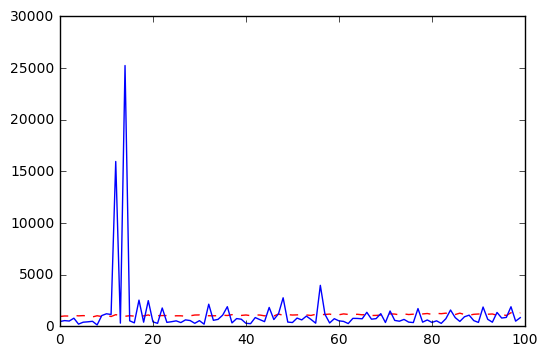

In [145]:
import matplotlib.pyplot as plt
plt.plot(predictions, 'r--')
plt.plot(measureds)
plt.show()

In [146]:
print (np.corrcoef(predictions,measureds))

[[ 1.    -0.086]
 [-0.086  1.   ]]


In [147]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor()

mlp.fit(X_red, Y)

predictions = []
measureds = []
scores = []
for i in range(len(test_sets)):
    X_t, Y_t = test_sets[i]
    X_t = pca.transform(X_t)
    prediction = mlp.predict(X_t)
    prediction = sum(prediction)#scaler_y.inverse_transform(prediction))
    measured = sum(Y_t)#scaler_y.inverse_transform(Y_t))
    score = mlp.score(X_t, Y_t)
    predictions.append(prediction)
    measureds.append(measured)
    scores.append(score)

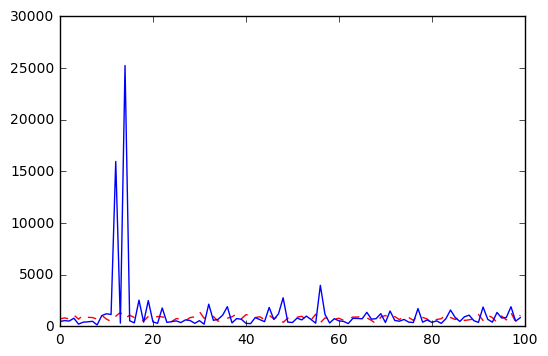

In [148]:
plt.plot(predictions, 'r--')
plt.plot(measureds)
plt.show()

In [149]:
print (scores)
print (np.corrcoef(predictions,measureds))

[-1.6319129966006889, -0.093726479036469357, -0.70404611335294986, -0.23937496797933422, -5.0192931964688698, -2.5352574470637315, -2.4650293572832571, -0.73148479393402521, -24.732356192067378, -0.079595456429964351, -0.077239143839344937, -0.11919785021921503, 0.00034410196904743895, -1.9766149369765371, -0.00026353479120122536, -0.7232763217453706, -2.3124016595050523, 0.031837557167230468, -2.574006050228411, 0.046904006258843493, -0.93461652472873991, -5.0338630747468569, 0.0085300839901906178, -1.62063241450333, -0.7035740955316252, -1.422815151925656, -2.1132493935789145, -0.77380226987913514, -0.79281615941905481, -4.7575316911473786, -2.8109699542533071, -7.850726127287647, 0.015174873647689102, -0.52260962253723608, -0.097426012880472479, -0.14019468317869022, 0.010344767868345817, -4.3039378368841952, -0.57140584278802398, -0.47344666664815138, -4.1847591793525343, -6.0437768371240645, -0.12167081258673274, -0.5816219200718229, -1.032402030842154, -0.020440033253894985, -0.4